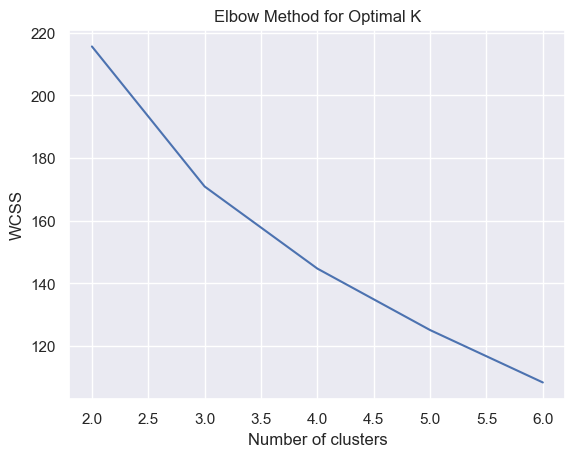

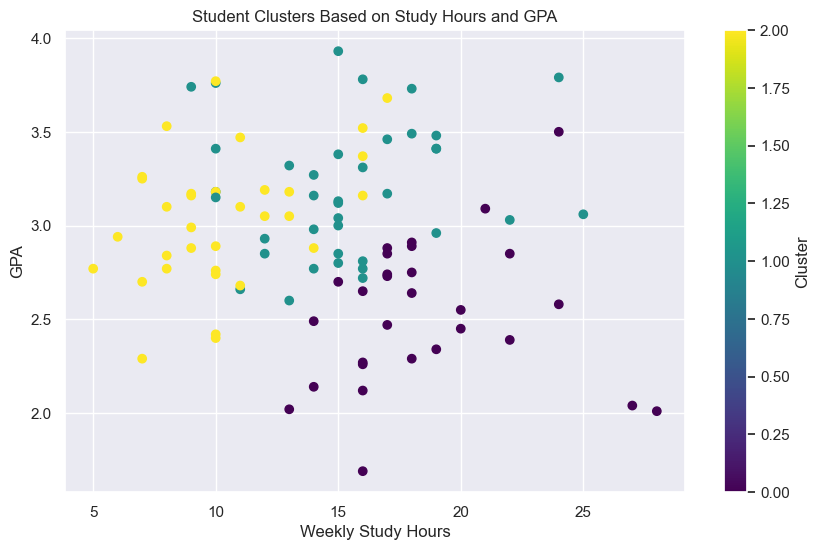


Cluster Statistics:
              GPA           study_hours           attendance_rate            \
             mean       std        mean       std            mean       std   
cluster                                                                       
0        2.527241  0.383041   18.551724  3.708929       74.344828  8.230066   
1        3.195000  0.354407   15.342105  3.685445       88.421053  6.656156   
2        3.034545  0.351569   10.272727  3.044182       75.060606  8.370108   

        student_id  
             count  
cluster             
0               29  
1               38  
2               33  

Sample of students with their cluster assignments:
   student_id  cluster
0           1        2
1           2        1
2           3        1
3           4        1
4           5        2
5           6        0
6           7        1
7           8        1
8           9        1
9          10        1


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
import seaborn as sns
plt.style.use('dark_background')
sns.set_theme(style="darkgrid")


np.random.seed(42)
n_students = 100
student_ids = np.arange(1, n_students+1)
gpa = np.round(np.random.normal(3.0, 0.5, n_students).clip(1.0, 4.0), 2)
study_hours = np.random.normal(15, 5, n_students).clip(5, 30).astype(int)
attendance_rate = np.random.normal(80, 10, n_students).clip(50, 100).astype(int)

student_data = pd.DataFrame({
    'student_id': student_ids,
    'GPA': gpa,
    'study_hours': study_hours,
    'attendance_rate': attendance_rate
})

X = student_data[['GPA', 'study_hours', 'attendance_rate']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []
for i in range(2, 7):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(2, 7), wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)


student_data['cluster'] = clusters

plt.figure(figsize=(10, 6))
scatter = plt.scatter(student_data['study_hours'], student_data['GPA'], 
                     c=student_data['cluster'], cmap='viridis')
plt.title('Student Clusters Based on Study Hours and GPA')
plt.xlabel('Weekly Study Hours')
plt.ylabel('GPA')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

cluster_stats = student_data.groupby('cluster').agg({
    'GPA': ['mean', 'std'],
    'study_hours': ['mean', 'std'],
    'attendance_rate': ['mean', 'std'],
    'student_id': 'count'
})

print("\nCluster Statistics:")
print(cluster_stats)

print("\nSample of students with their cluster assignments:")
print(student_data[['student_id', 'cluster']].head(10))